In [113]:
import numpy as np
import h5py
import pandas as pd
import seaborn as sns
import seaborn.objects as so
import matplotlib as plt
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=True

In [114]:
hf = h5py.File("SPICE_db.hdf5", "r")

In [115]:
df = pd.DataFrame(np.array(hf["C#C.[Na+]"]["subset"]))
df.head()
display(df)

,0
0,b'SPICE DES370K Single Points Dataset Suppleme...


In [116]:
pubchem_keys = []
for i in range(14643):
    pubchem_keys.append(np.array(hf)[i])


In [117]:
print(pubchem_keys[-2:])


['85856631', '85856655']


In [118]:
conformer_list = []
for i in range(len(pubchem_keys)):
    temp_df = pd.DataFrame(np.array(hf[pubchem_keys[i]]["dft_total_energy"]))
    temp_list = list(temp_df[0])
    conformer_list.append(temp_list)

In [119]:
abs_energy_diff = []
for i in range(len(conformer_list)):
    conformer_list[i].sort()
    abs_energy_diff.append(conformer_list[i][-1]-conformer_list[i][0])

[Text(0.5, 0, 'Pubchem entry'), Text(0, 0.5, 'Absolute energy difference')]

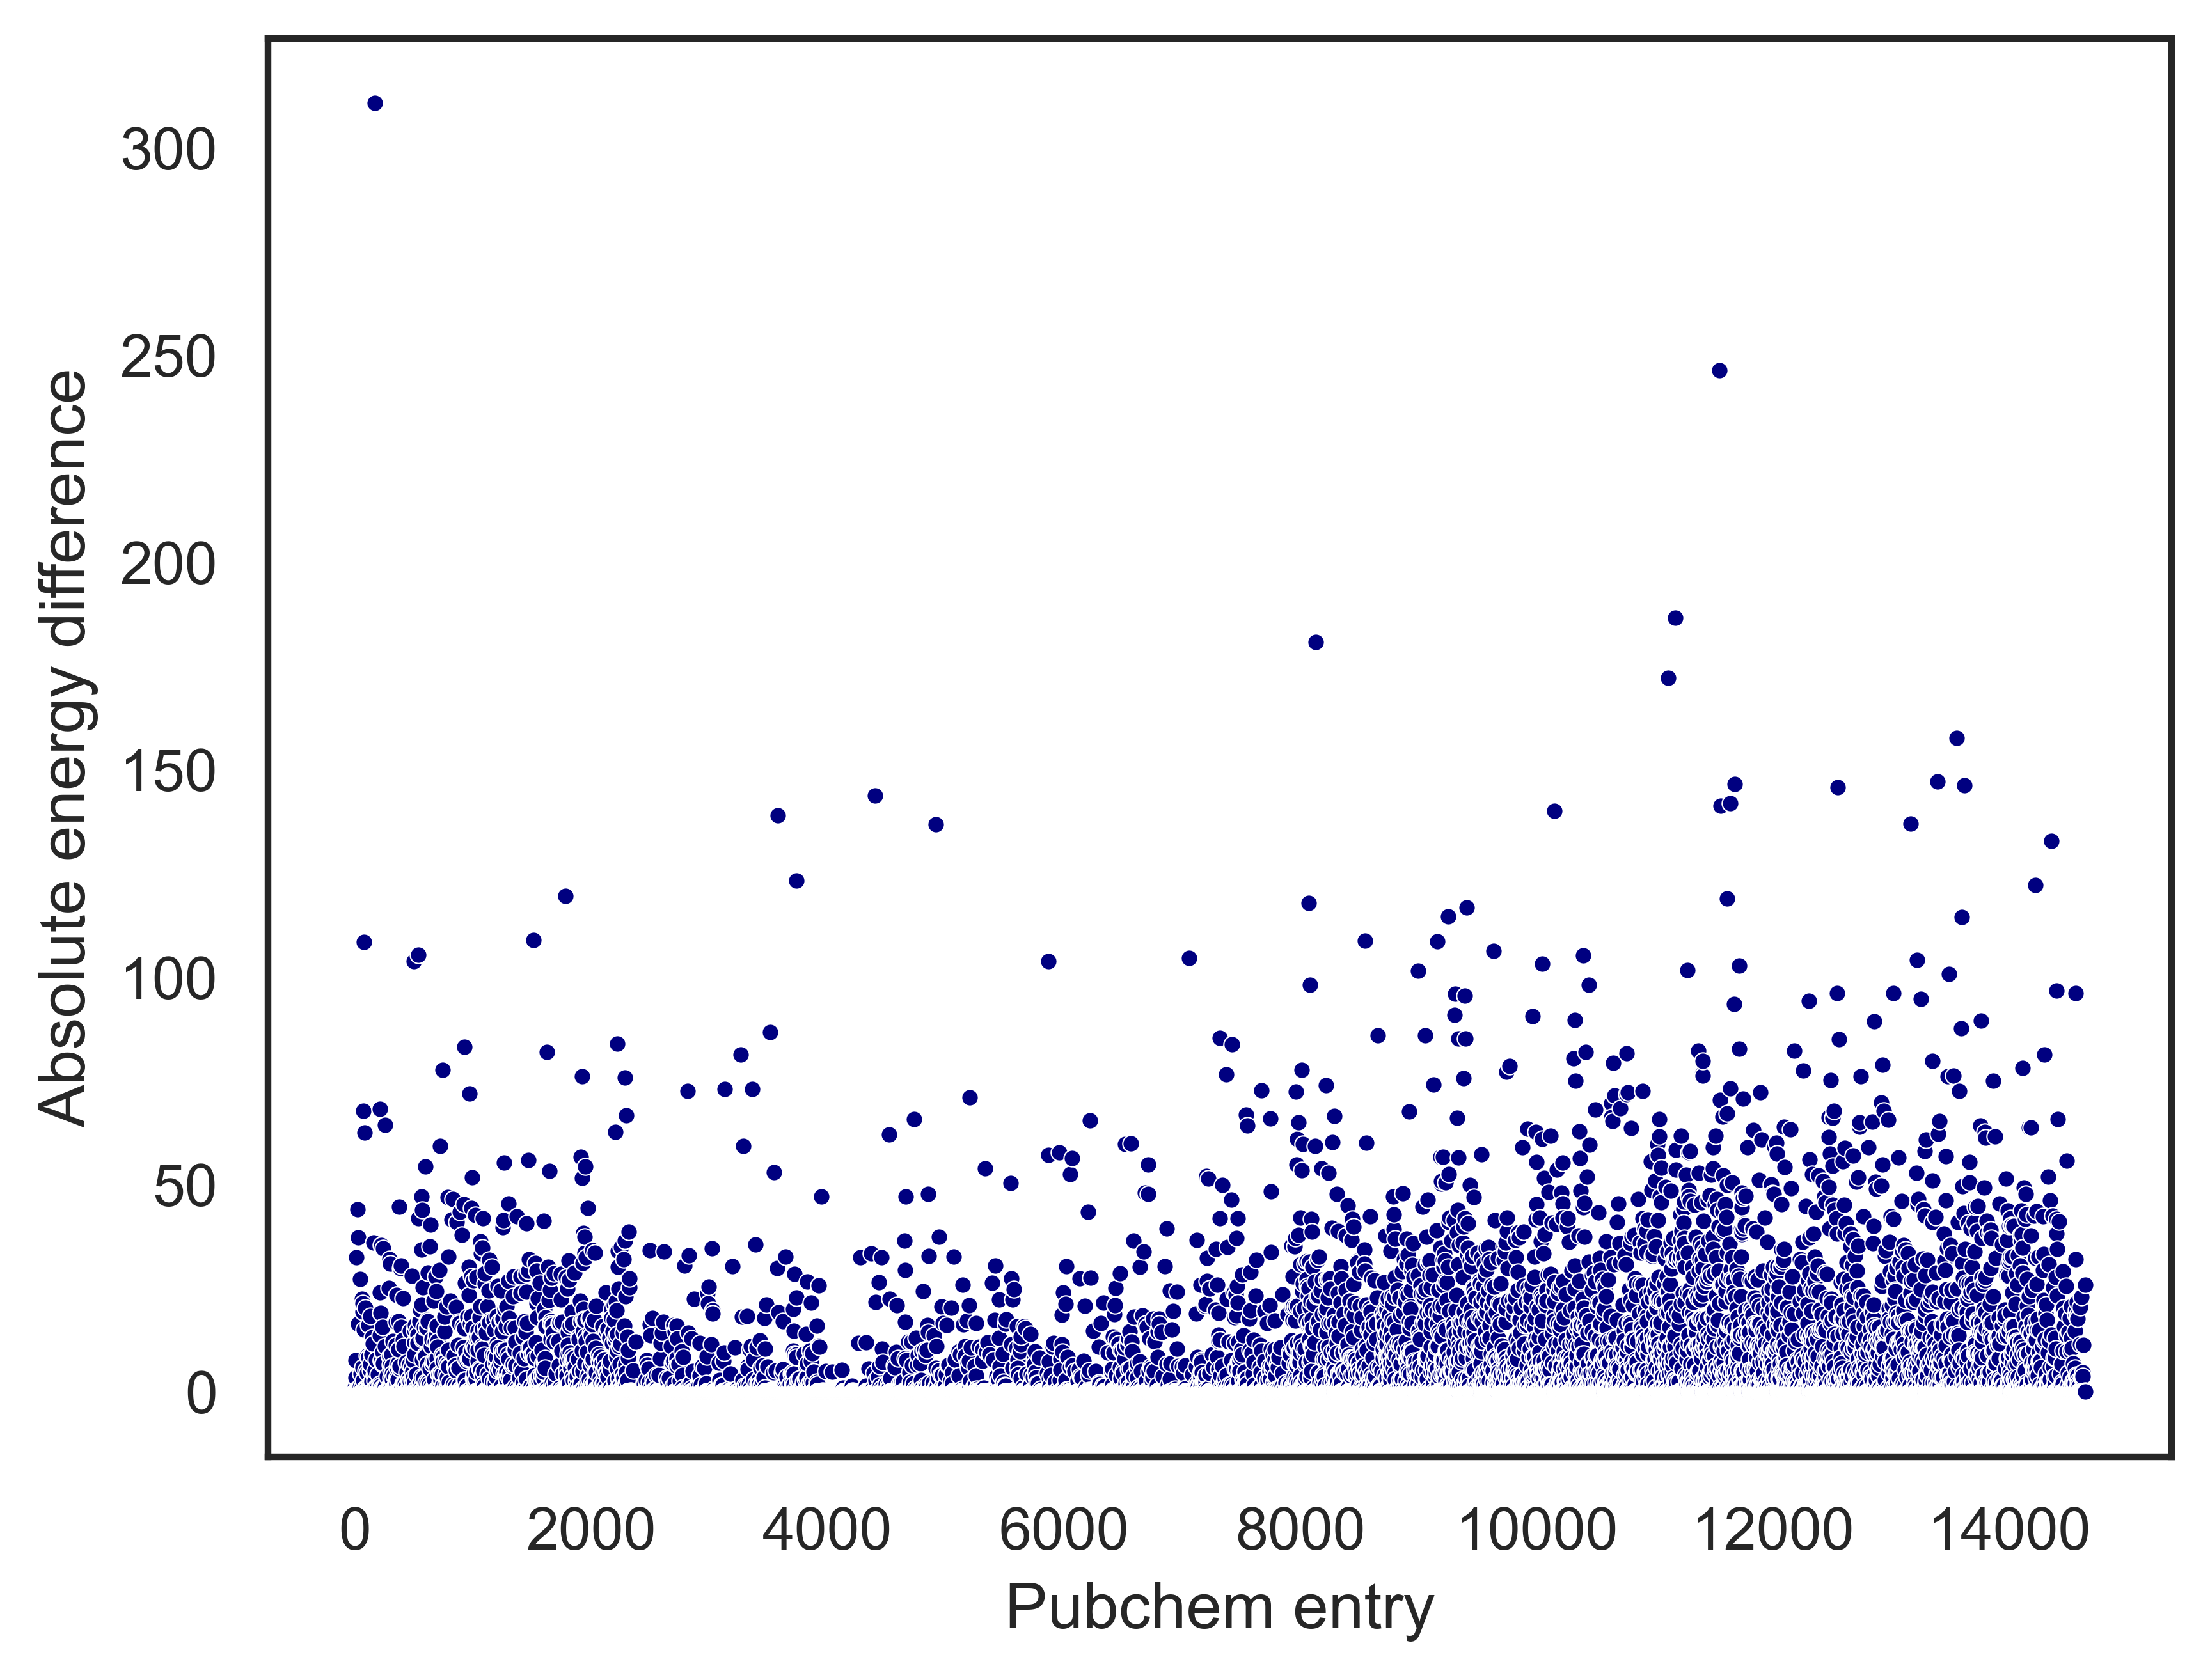

In [150]:
plt.rcParams['figure.dpi'] = 600
sns.set(font_scale=1.5)
sns.set_theme(style="white")
ax = sns.scatterplot(abs_energy_diff, s=10, color="navy")
ax.set(xlabel="Pubchem entry", ylabel="Absolute energy difference")

In [121]:
high_diff_conformers = []
faulty_energy_diff = []
for i in range(len(abs_energy_diff)):
    if abs_energy_diff[i] > 100:
        high_diff_conformers.append(pubchem_keys[i])
        faulty_energy_diff.append(str(int(abs_energy_diff[i])))
print(high_diff_conformers)

['103925069', '103934044', '103976723', '103981518', '104101472', '104131432', '135078158', '135084333', '135104075', '135136729', '135181857', '135240828', '136963757', '136969869', '163356878', '172649757', '194690621', '220230486', '242053474', '252616872', '252632136', '252635504', '252644687', '313070470', '313083544', '316935970', '336292655', '336949228', '340129831', '340133408', '341104204', '346544032', '384991103', '433913602', '433923305', '433942855', '433951080', '433955861', '433961531', '433963224', '441576707', '442143241']


Pubchem id to SMILES and Structures

In [122]:
faulty_conformers = []
molecules = []
for i in range(len(high_diff_conformers)):
    temp_df= pd.DataFrame(np.array(hf[high_diff_conformers[i]]["smiles"]))
    faulty_conformers.append(temp_df[0][0])
    molecule = Chem.MolFromSmiles(faulty_conformers[i])
    molecules.append(molecule)

Draw.MolsToGridImage(molecules[:], subImgSize=(500,500), legends=faulty_energy_diff[:])

Some conformer energies seem to be irratioanlly high/low. For example entry 103934044:

In [123]:
df = pd.DataFrame(np.array(hf["103934044"]["dft_total_energy"]))
display(df)

,0
0,-954.847667
1,-954.854336
2,-954.851351
3,-954.836779
4,-954.850746
5,-954.842447
6,-954.834110
7,-954.843789
8,-954.863556
9,-954.833196


In [124]:
df = pd.DataFrame(np.array(hf["341104204"]["dft_total_energy"]))
display(df)

,0
0,-1510.116561
1,-1510.119286
2,-1510.019033
3,-1510.024420
4,-1510.048552
5,-1510.029825
6,-1510.023204
7,-1510.013897
8,-1510.040625
9,-1510.056306
